In [1]:
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

2024-05-06 23:08:11.601968: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_url = 'Data2.csv'
df = pd.read_csv(data_url)

In [3]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  conf_matrix = confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('Model Accuracy is: ', round(acc_score, 2))
  print(conf_matrix)
  print(clas_rep)

In [4]:
y = df['Class']
X = df.iloc[:, df.columns != 'Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest

In [5]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
preds_rf_test = rf.predict(X_test)
model_eval(y_test, preds_rf_test)

Model Accuracy is:  1.0
[[42342    11]
 [    1 22988]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42353
           1       1.00      1.00      1.00     22989

    accuracy                           1.00     65342
   macro avg       1.00      1.00      1.00     65342
weighted avg       1.00      1.00      1.00     65342



In [6]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, preds_rf_test)
rf_roc_auc = auc(rf_fpr, rf_tpr)
print("AUC Score:", rf_roc_auc)

AUC Score: 0.9998483895368663


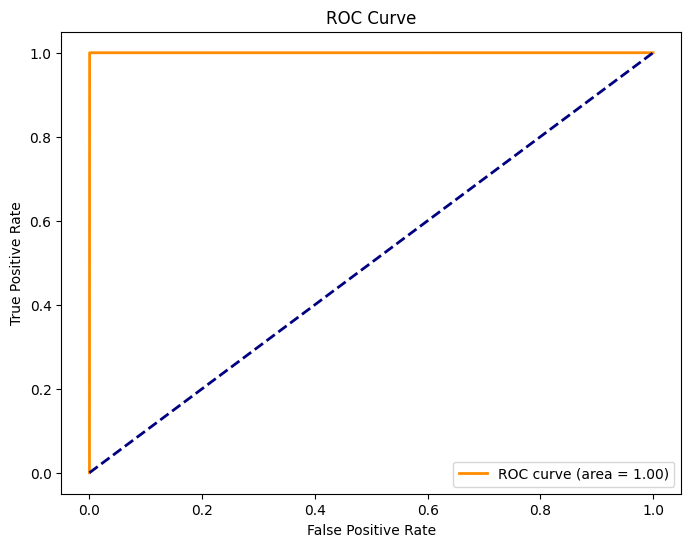

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Neural Network

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/10


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) 
model_eval(y_test, y_pred)

In [ ]:
nn_fpr, nn_tpr, nn_thresholds = roc_curve(y_test, y_pred_prob)
nn_roc_auc = auc(nn_fpr, nn_tpr)
print("AUC Score:", nn_roc_auc)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(nn_fpr, nn_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % nn_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()